In [112]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm
from sklearn.metrics import r2_score as r2
import seaborn as sns
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)





In [113]:
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head(10)


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [114]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [115]:
dfcars.boxplot()

<Axes: >

In [116]:
# check correlation coefficient for above 3 variables
print("mpg vs disp:\n",np.corrcoef(dfcars["mpg"], dfcars["hp"]))


mpg vs disp:
 [[ 1.         -0.77616837]
 [-0.77616837  1.        ]]


In [117]:
X=dfcars['mpg']
y=dfcars['hp']


In [118]:
print("shape X:", X.shape,"dimensions", X.ndim)
print("shape y:",y.shape,"dimensions:",y.ndim)


shape X: (32,) dimensions 1
shape y: (32,) dimensions: 1


In [119]:
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)
# verify shape and dimension for scikit-learn use
print("shape X:",X.shape,"dimensions:",X.ndim)
print("shape y:",y.shape,"dimensions:",y.ndim)

shape X: (32, 1) dimensions: 2
shape y: (32, 1) dimensions: 2


In [120]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [121]:
print("model coeficient:",model.coef_) # this is m in y=mx+b
print("model intercept:",model.intercept_) # this is b in y=mx+b
pred = model.predict(X)

model coeficient: [[-8.82973099]]
model intercept: [324.08231421]


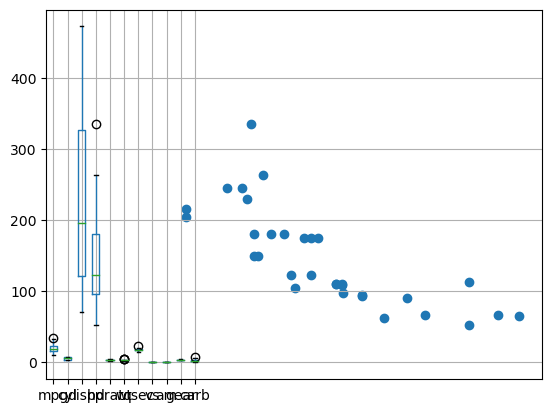

In [122]:
y=dfcars['mpg']
X=dfcars['hp']
plt.scatter(y,X)
plt.show()

In [125]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           1.79e-07
Time:                        22:31:47   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

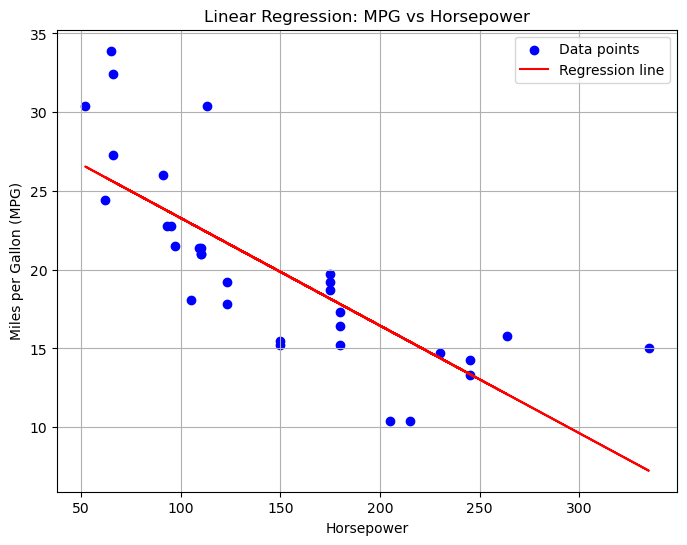

In [130]:
# Plotting the relationship between horsepower and mpg
plt.figure(figsize=(8, 6))

# Scatter plot of actual data points
plt.scatter(dfcars['hp'], dfcars['mpg'], color='blue', label='Data points')

# Line representing the fitted regression line
plt.plot(dfcars['hp'], model.predict(X), color='red', label='Regression line')

# Adding labels and title
plt.title('Linear Regression: MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
print("error MSE", mse(y,pred))
print("error R2", r2(y,pred))
print("error RMSE:", np.sqrt(mse(y,pred)))

error MSE 19426.854567156817
error R2 -551.0721982612458
error RMSE: 139.38025171148465


In [137]:
import warnings
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", 
                  "exponweib",
                  "pareto", 
                  "weibull_max", 
                  "weibull_min",
                  "skewnorm",
                  "norminvgauss",
                  "powernorm",
                  "uniform"]
    
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print(" ")
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

In [138]:
get_best_distribution(dfcars['hp'])

p value for norm = 0.290101244862747
p value for exponweib = 0.5311493340233245
p value for pareto = 0.21542810115115207
p value for weibull_max = 3.651530432699742e-23
p value for weibull_min = 0.6729184174558759
p value for skewnorm = 0.7439537458312477
p value for norminvgauss = 0.555887985822214
p value for powernorm = 0.3973321557091699
p value for uniform = 0.0013822538719682198
 
Best fitting distribution: skewnorm
Best p value: 0.7439537458312477
Parameters for the best fit: (24.43907603150236, 53.12420750439688, 115.360574625987)


In [143]:
get_best_distribution(dfcars['mpg'])

p value for norm = 0.6551921328280882


c:\Users\keith\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:2008: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


p value for exponweib = 3.967647014518113e-14
p value for pareto = 3.150690229632891e-10
p value for weibull_max = 5.790249942603081e-15
p value for weibull_min = 0.9610736530425228
p value for skewnorm = 0.9840898654910888
p value for norminvgauss = 0.992791884651168
p value for powernorm = 0.9340465135400865
p value for uniform = 0.02662939154504307
 
Best fitting distribution: norminvgauss
Best p value: 0.992791884651168
Parameters for the best fit: (55.75587530143133, 54.72691729368998, 0.8361761745695935, 3.7501131238012597)
